In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import VGG19

In [2]:
image_generator = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [3]:
# Define your data augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Rescale images to [0, 1] range
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Define data generators for validation and test data
test_val_datagen = ImageDataGenerator(
    rescale=1./255  # Only rescale for validation and test data
)

In [4]:
train_dataset = train_datagen.flow_from_directory(
    directory='Dataset/train',
    target_size=(224, 224), 
    batch_size=32,  
    class_mode='categorical'
)

val_dataset = test_val_datagen.flow_from_directory(
    directory='Dataset/test',
    target_size=(224, 224),
    batch_size=32,  
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
class_indices = train_dataset.class_indices
class_names = list(class_indices.keys())
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [6]:
class_indices = val_dataset.class_indices
class_names = list(class_indices.keys())
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

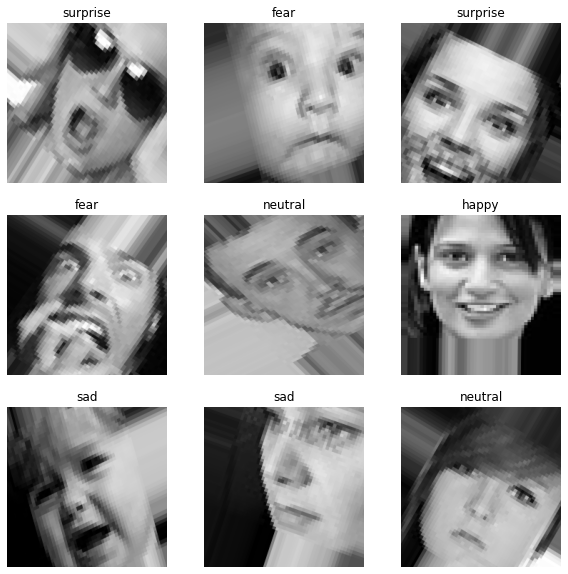

In [7]:
import matplotlib.pyplot as plt
images, labels = next(train_dataset)
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = images[i]
    if img.max() > 1.0:
        img = img / 255.0
    plt.imshow(img)
    plt.title(class_names[labels[i].argmax()]) 
    plt.axis("off")
plt.show()

In [8]:
img_width= 224
img_height = 224
img_size = (img_width,img_height)
batch_size = 32
num_classes = 7

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential
import matplotlib.pyplot as plt

img_size = 224  
input_shape = (img_size, img_size, 3)

# Create a Sequential model with data augmentation layers
data_augmentation = Sequential([
    layers.Input(shape=input_shape),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

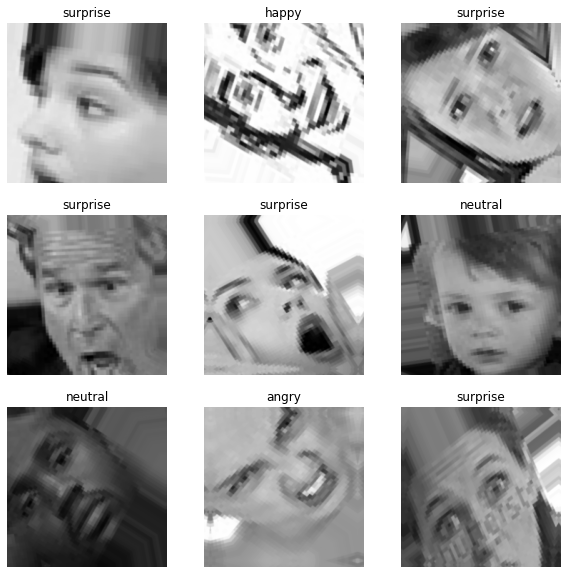

In [10]:
import matplotlib.pyplot as plt
images, labels = next(train_dataset)
augmented_images = data_augmentation(images)

plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = augmented_images[i].numpy()
   
    if img.max() > 1.0:
        img = img / 255.0
    plt.imshow(img)
    plt.title(class_names[labels[i].argmax()]) 
    plt.axis("off")
plt.show()


In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [12]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
# my_callbacks = [EarlyStopping(monitor='loss', patience=5, min_delta=0.00001)]

In [ ]:
history = model.fit(
    train_dataset,
    batch_size = batch_size,
    epochs=10,
    validation_data=val_dataset
)


Epoch 1/10


C:\Users\intel 4\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 3945s 4s/step - accuracy: 0.2794 - loss: 1.8054 - val_accuracy: 0.3883 - val_loss: 1.5866
Epoch 2/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 3737s 4s/step - accuracy: 0.3378 - loss: 1.6649 - val_accuracy: 0.4071 - val_loss: 1.5486
Epoch 3/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 3613s 4s/step - accuracy: 0.3528 - loss: 1.6425 - val_accuracy: 0.4149 - val_loss: 1.5259
Epoch 4/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 3692s 4s/step - accuracy: 0.3559 - loss: 1.6337 - val_accuracy: 0.4205 - val_loss: 1.5000
Epoch 5/10
898/898 ━━━━━━━━━━━━━━━━━━━━ 3686s 4s/step - accuracy: 0.3735 - loss: 1.6130 - val_accuracy: 0.4241 - val_loss: 1.4966
Epoch 6/10
177/898 ━━━━━━━━━━━━━━━━━━━━ 43:28 4s/step - accuracy: 0.3668 - loss: 1.6137

In [ ]:
model.save('newx_model.h5')

In [ ]:
# import matplotlib.pyplot as plt

# # Extract accuracy values from history
# accuracy = history.history['accuracy']

# # Create a list of epochs for x-axis
# epochs = range(1, len(accuracy) + 1)

# # Plotting the bar graph
# plt.figure(figsize=(10, 6))
# plt.bar(epochs, accuracy, color='blue', alpha=0.7)
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Score')
# plt.xticks(epochs)
# plt.ylim(min(accuracy) - 0.02, max(accuracy) + 0.02)  # Adjust ylim for better visualization
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()


In [ ]:
# # Plotting the line graph
# plt.figure(figsize=(10, 6))
# plt.plot(epochs, accuracy, marker='o', linestyle='-', color='blue', label='Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.title('Accuracy Score')
# plt.xticks(epochs)
# plt.ylim(min(accuracy) - 0.02, max(accuracy) + 0.02)  # Adjust ylim for better visualization
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend()
# plt.show()
